# Probabilidad:

Corresponde a una rama de las matemáticas que se dedica a investigar sobre las formas de tomar decisiones con base en información incompleta.

La probabilidad se puede dividir en dos escuelas de pensamiento:

- Frecuentista: defiende que mediante la repetición indefinida de los sucesos se puede obtener los resultados teoricos.
- Bayesiana: asume que las probabilidades teoricas son iguales a las reales.

**$ Probabilidad =\text{Es una creencia que tenemos sobre la ocurrencia de suscesos elementales} $**

## Axiomas de la probabilidad:

1. $0 \leq P \leq 1 $: significa que la probabilidad siembra esta entre 0 y 1.
2. $Certeza \rightarrow P =1$: Un evento certero tiende a tener una probabilidad igual a 1.
3. $Imposibilidad \rightarrow P =0$:Un evento imposible tiende a tener una probabilidad igual a 0.
4. $Disyuncion \rightarrow P(a\cup b) =P(a)+P(b)$: En caso que se genere una situación u otra, es igual a la suma de las probabilidades de cada suceso.


## Probabilidad en Machine Learnig:

En machine learnig se aplica la probabilidad para analizar las diferentes fuentes de incertidumbre las cuales corresponden a:

1. **Los datos**: Es decir la información base que se utiliza en el caso de estudio, dado que todos los metodos de recoleccion de información tienen cierto grado de error, lo cual genera que se cuente con información tanto incompleta como imperfecta.
2. **Los atributos del modelo**: Es decir la información procesada que se le suministra al modelo, es frecuente que esta información (predictores) sea preprocesada para facilitar/optimizar un digestión por el modelo, por lo tanto este preprocesamiento  (escalamiento, reduccion de variables, etc) genera perdida de información o agrega una capa de incertidumbre sobre la fiabilidad de los resultados.
3. **La arquitectura del modelo**: En si mismo, un modelo responde a una representación simplificada de la realidad, esto en si mismo, genera otra capa de incertidumbre, dado que para su construcción se omite información o en su defecto depende de la interpretación de la realidad con la que se construya el modelo.

## Tipos de probabilidad:

1. **Conjunta (*joint*)**: Representa los resulados de la ejecución de las n situaciones tomadas como una sola o lo mismo que $$ P(a\cap b) = P(a|b)P(b)$$
2. **Condicional**: Responde al resultado de la situación b dado que sucedio la situación a, es decir se condiciona b ha que primero haya sucedido a. $$ P(a | b)= \frac{P(a\cap b)}{p(b)}$$
3. **Marginal**:Representa los resultados de la probabilidad de a independientes de b. 
$$ P(b)=P(a\cap b)/P(a|b)$$

## Distribución de probabilidad

Corresponde a la funcion que determina la probabilidad de un evento dado, es por esto que $f(x)$ corresponde a la ecuación que determina el resultado de la probabilidad de un evento.

Se debe aclarar que en notación estadistica las variables se definen en mayuscula y los posibles valores que toma la variable se notan con minuscula por lo tanto la probabilidad de que X obtenga un valor de x se denota como: $P(X=x)$ y dicha probabilidad responde a una funcion que depende de la variable X es decir:
$$ P=f(X) \quad\text{esta función tambien se denomina densidad de probabilidad}$$

La densidad de probabilidad puede ser:
- Continua
- Discreta

Así mismo, la integral definida de la función responde a probabilidad acumulada (área bajo la curva) entre dos limites definidos, por lo tanto, la integral indefinida responde a la funcin de probabilidad acumulada:

$$ C(X) = \int P(X) \mathrm{d}X \quad\text{Es la funcion de probabilidad acumulada}$$


### Distribución de Bernoulli:

Es una distribución que se asocia a distribuciones binarias es decir, solo tienen dos valores:

$$ P(X=1) = p \quad\text{probabilidad que salga el evento favorable}$$
$$ P(X=0) = 1- p \quad\text{probabilidad que no salga el evento favorable}$$

para resolver este tipo de distribuciones se utiliza la combinatoria en la cual se establece que:

$$ _nC_k = \begin{pmatrix}
    n \\
    k
    \end{pmatrix} = \frac{n!}{k!(n-k)!}$$

$$\text{Donde } n\text{: es el numero de intentos y } k\text{: es el numero de casos favorables buscados} $$

Por lo tanto, la distribución binomial esta dada por:

$$ P(k,n,p) =  (_nC_k) p^k (1-p)^{n-k} \quad\text{con } p =\frac{1}{2} \text{ en el caso ideal}$$

#### Codigo:
##### Librerias:

In [25]:
import numpy as np
from numpy.random import binomial, normal
from scipy.stats import binom, norm
from math import factorial
import matplotlib.pyplot as plt

##### Secuencia de eventos tipo Bernoulli:

Se procede a la construccion de la función en forma de una funcion de pyton, o utilizando la libreria de scipy.

El metodo `.pmf()` representa la densidad de probabilidad para el numero de casos favorables que se desean y el metodo `.cdf()` que representa la función de probabilidad acumulada.

In [46]:
def bernoulli(k: int, n:int, p: float):
    return (factorial(n)/(factorial(k)*factorial(n-k)))*pow(p, k)*pow(1-p, n-k)

bernoulli(2, 3, 0.5)

0.375

In [47]:
dist = binom(3, 0.5)
dist.pmf(2)

0.3750000000000001

In [48]:
dist.cdf(2)

0.875

De manera que la densidad de probailidad para n=2, k=3 y p=0.5, es de 0.375 o lo que es los mismo $\frac{3}{8}$ y la funcion de probabilidad acumulada es de 0.875 o $\frac{7}{8}$

##### Simulaciones de secuencias con generadores aleatorios:

Se realiza un experimento computarizado que simule las condiciones reales tales como lanzar una moneda o un dado.

Para este ejercicio se realizará una simulación con 100 lanzamientos de una moneda equilibrada.

Para esto se utiliza la funcion binomial del paquete random de la libreria numpy.

In [49]:
p=0.5
n=3

binomial(n, p)

2

In [50]:
results = []
cont = 0

while cont <= 100:
    results.append(binomial(n, p))
    cont+=1

Con el codigo anterior se busca repetir el mismo ejercicio 100 veces y guardar los resultados en un arreglo/lista para a continuación hallar el histograma.

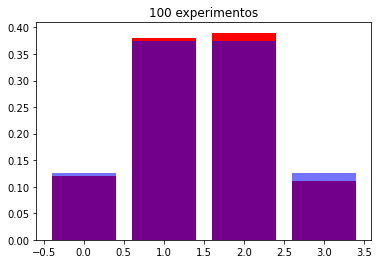

In [51]:
def plot_hist(intentos):
    val = [0, 1, 2, 3]
    results = []
    for _ in range(intentos):
        results.append(binomial(n, p))
    simulacion = np.unique(results, return_counts=True)[1]/len(results)
    teorica = [binom(3, 0.5).pmf(k) for k in val]
    plt.bar(val, simulacion, color='r')
    plt.bar(val, teorica,alpha=0.55, color='b')
    plt.title(f'{intentos} experimentos')
    plt.show

plot_hist(100)

### Distribuciones continuas:

#### Distribución Normal:

La distribución normal o gaussiana es la distribución continua más utilizada y se puede describir mediante:

$$ P(X)=\frac{1}{\sigma\sqrt{2\pi}}exp^{-\frac{1}{2}(\frac{X-\mu}{\sigma})^2}$$

Donde $\mu$ es la media de la distribución y $\sigma$ es la desviación estandar de la distribución.

In [52]:
def gaussiana(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*pow(((x-mu)/sigma), 2))

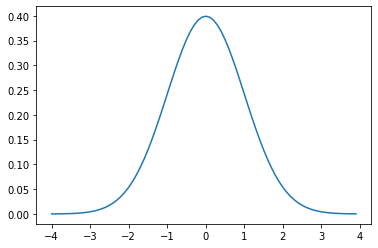

In [53]:
x = np.arange(-4, 4, 0.1)
y = gaussiana(x, 0.0, 1)

plt.plot(x, y)

Tambien se puede generar una distribución normal a partir de la funcion norm del paquete Stats de la libreria scipy, en donde el metodo `.pdf()` es la funcion de densidad de probabilidad. y el metodo `.cdf` es la funcion de densidad de probabilidad acumulada

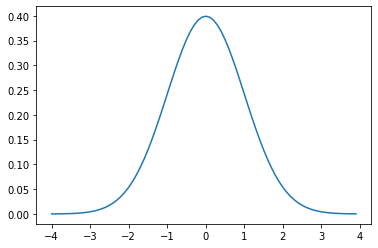

In [54]:
normal=norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = [normal.pdf(i) for i in x]

plt.plot(x,y)

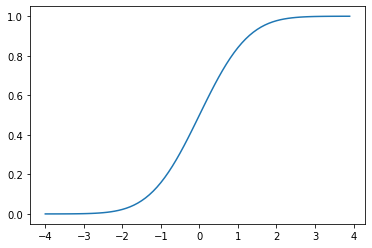

In [23]:
normal=norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = [normal.cdf(i) for i in x]

plt.plot(x,y)

In [22]:
!ls

1estadisticos.ipynb		 4matrixCovarianza.ipynb  data.xls
2pipelineDatosNumericos.ipynb	 5pca.ipynb		  notas
3pipelineDatosCategoricos.ipynb  6probabilidad.ipynb


Tambien se puede observar que la distribución normal tambien es propia de los elementos naturales como por ejemplo con la longitud de las alas de las moscas.

In [24]:
import pandas as pd
df = pd.read_excel('data.xls')
df.sample(5)

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
44,45,NaN,NaN,NaN
100,53,NaN,NaN,NaN
6,38,NaN,40-42,10
87,50,NaN,NaN,NaN
73,48,NaN,NaN,NaN


In [ ]:
arr = df['Normally Distributed Housefly Wing Lengths'].values[4:]

<BarContainer object of 19 artists>

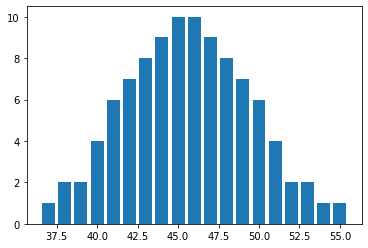

In [26]:
val, frecuencia = np.unique(arr, return_counts=True)

plt.bar(val, frecuencia)

Con la grafica anterior evenciamos que aparentemente la distribución de frecuencias de las alas de las moscas sigue una distribución normal, sin embargo para validar esta afirmación podemos generar una funcion de densidad de probabilidad con promedio de los datos $\mu$ y desviación estandar $\sigma$ y compararlo con el histograma de frencuencias, sin embargo par que ambos graficos se encuentren en la misma escala se debe dividir el conteo de la frencuencia de los valores entre el valor total de valores, de manera que se obtenga la frencuencia en terminos relativos (porcentaje)

<BarContainer object of 19 artists>

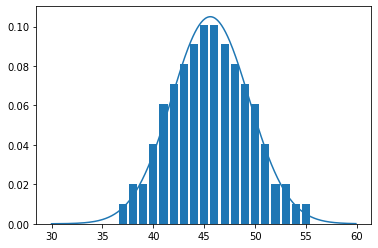

In [20]:
mu = arr.mean()
sigma = arr.std()
x = np.arange(30,60, 0.1)
dist = norm(mu,sigma)
y = [dist.pdf(i) for i in x]
plt.plot(x, y)
val, frec = np.unique(arr, return_counts=True)
plt.bar(val, frec/len(arr))

### Estimar la densidad de probabilidad:

(array([1.000e+00, 1.000e+00, 2.000e+00, 1.000e+01, 1.600e+01, 3.300e+01,
        5.100e+01, 1.120e+02, 1.730e+02, 2.940e+02, 4.320e+02, 5.650e+02,
        7.270e+02, 8.130e+02, 9.970e+02, 1.023e+03, 1.022e+03, 9.040e+02,
        8.430e+02, 6.200e+02, 5.000e+02, 3.570e+02, 2.090e+02, 1.430e+02,
        7.300e+01, 3.900e+01, 2.000e+01, 1.100e+01, 4.000e+00, 5.000e+00]),
 array([-4.07894539, -3.82028982, -3.56163426, -3.30297869, -3.04432312,
        -2.78566756, -2.52701199, -2.26835643, -2.00970086, -1.75104529,
        -1.49238973, -1.23373416, -0.97507859, -0.71642303, -0.45776746,
        -0.1991119 ,  0.05954367,  0.31819924,  0.5768548 ,  0.83551037,
         1.09416594,  1.3528215 ,  1.61147707,  1.87013263,  2.1287882 ,
         2.38744377,  2.64609933,  2.9047549 ,  3.16341047,  3.42206603,
         3.6807216 ]),
 <BarContainer object of 30 artists>)

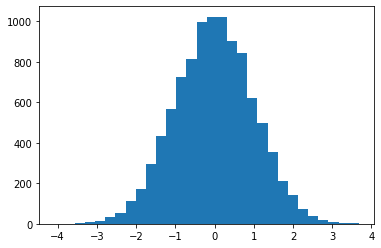

In [27]:
sample = normal(size = 10000) #generador de numeros aleatorios con dist Normal
plt.hist(sample, bins = 30)

#### Estimación paramétrica: 

La estimación parametrica implica forzar los datos a contar con una distribución normal, de manera que se puedan realizar estimativos con los valores obtenidos.

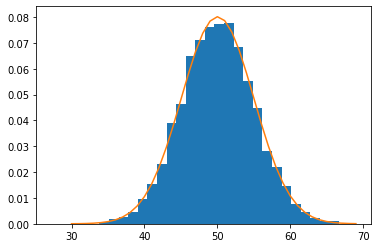

In [33]:
sample = normal(size = 10000, loc=50, scale=5) #mu=loc y sigma=scale
plt.hist(sample, bins = 30, density=True)
mu = sample.mean()
sigma = sample.std()
dist = norm(mu,sigma)
value = [value for value in range(30, 70)]
probabilidades = [dist.pdf(i) for i in value]

plt.plot(value, probabilidades)
plt.show()

#### Estimación no paramétrica:

Significa que no se estan forzando parametros de una distribución, sino que se realiza una combinación de multiples distribuciones.

Para el ejercicio se plantea utilizar el dataframe de densidad de kernel de scikit-learn 

(array([0.00098625, 0.        , 0.        , 0.00098625, 0.00690373,
        0.00295874, 0.00493124, 0.00197249, 0.00197249, 0.01479371,
        0.00986247, 0.01479371, 0.02268369, 0.02662868, 0.01577996,
        0.02465618, 0.0167662 , 0.02071119, 0.0187387 , 0.02366994,
        0.02071119, 0.00986247, 0.01380746, 0.01380746, 0.00887623,
        0.0187387 , 0.01183497, 0.01972495, 0.03057367, 0.02366994,
        0.04438113, 0.0355049 , 0.04240863, 0.03944989, 0.06410608,
        0.05325736, 0.06114733, 0.05325736, 0.04142239, 0.0542436 ,
        0.02465618, 0.02366994, 0.01479371, 0.01084872, 0.00690373,
        0.00788998, 0.00394499, 0.        , 0.00098625, 0.00197249]),
 array([ 3.94088852,  4.95483297,  5.96877742,  6.98272187,  7.99666632,
         9.01061077, 10.02455522, 11.03849967, 12.05244412, 13.06638857,
        14.08033302, 15.09427746, 16.10822191, 17.12216636, 18.13611081,
        19.15005526, 20.16399971, 21.17794416, 22.19188861, 23.20583306,
        24.21977751, 25.23

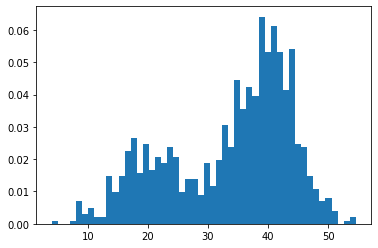

In [54]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

muestra1 = normal(loc=20, scale=5, size=300)
muestra2 = normal(loc=40, scale=5, size=700)
muestra = hstack((muestra1, muestra2))

plt.hist(muestra, bins=50, density= True)


Con el codigo anterior se busca unir las dos muestras generadas en una sola variable.

A continuación se utiliza el metodo de densidad de kernel que lo que busca es realizar un suavizado de los datos conforme una constante de suavizado `bandwidth` y un tipo de distribución `kernel`.

Para ejecutarlo guardamos el metodo en una variable (`modelo`) y la variable la ajustamos (`.fit`) conforme a los datos (`muestra`)

Con el metodo `.reshape()` lo que se busca es redimensionar el dataframe a una sola columna con n filas

In [58]:
modelo = KernelDensity(bandwidth=2, kernel='gaussian')
muestra = muestra.reshape((len(muestra), 1)) 
modelo.fit(muestra)

KernelDensity(bandwidth=2)

Ahora se procede a ajustar el modelo a los datos,para esto lo primero que hacemos es determinar los valores X de la funcion, es decir `values` esto lo hacemos mediante un array en el rango de los datos, y ese rango de los datos lo sabemos de la grafica anterior, es decir de 0 a 60.

luego proseguimos a hallar las probabilidades (frecuencias) de esos valores las cuales se obtienen del `modelo` que ya ha sido ajustado a los datos reales.

Este calculo lo hacemos primero por el metodo `.score_sample()` que realiza el calculo de forma algoritmica para reducir la complejidad temporal y posteriormente se convierten los resultados con el metodo `.exp()` para obtener los datos originales.

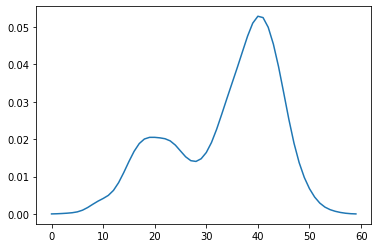

In [59]:
x = np.asarray([i for i in range(0, 60)])
x = x.reshape((len(x), 1))
y = modelo.score_samples(x) #probabilidad logarítmica
y = np.exp(y)  # inversión de probabilidad

plt.plot(x, y)

Finalmente validamos que la estimación de la funcion de densidad de probabilidad se ajuste a los datos originales:

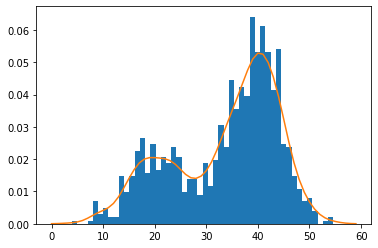

In [60]:
plt.hist(muestra, bins=50, density=True)
plt.plot(x, y)
plt.show()

Con Esto validamos que la funcion que generamos si se ajusta a los valores originales.